Importing Dataset

In [2]:
import pandas as pd
raisin = pd.read_csv("Raisin_Dataset.csv")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
# Create training and testing sets for your model
from sklearn.model_selection import train_test_split

target = raisin['Class']
del raisin['Class']
X_train, X_test, y_train, y_test = train_test_split(raisin, target, test_size=0.2, random_state=42)

Model 1: Logistic Regression

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import time

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())

start = time.time()
logistic_regression.fit(X_train, y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
accuracy = logistic_regression.score(X_train, y_train)
print(f"Accuracy on train set: {accuracy:.3f}")

start = time.time()
test_pred = logistic_regression.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Training Time:  0.04555869102478027
Accuracy on train set: 0.868
Query Time:  0.001809835433959961
Accuracy on test set: 0.856


Model 2: Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

train_score = tree.score(X_train, y_train)
print(f"Accuracy of training: {train_score:.2f}")

test_score = tree.score(X_test, y_test)
print(f"Accuracy of testing: {test_score:.2f}")

Accuracy of training: 1.00
Accuracy of testing: 0.79


In [9]:
max_depths = range(1,31)
train_score = []
test_score = []
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)

    tree.fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))

    test_score.append(tree.score(X_test, y_test))

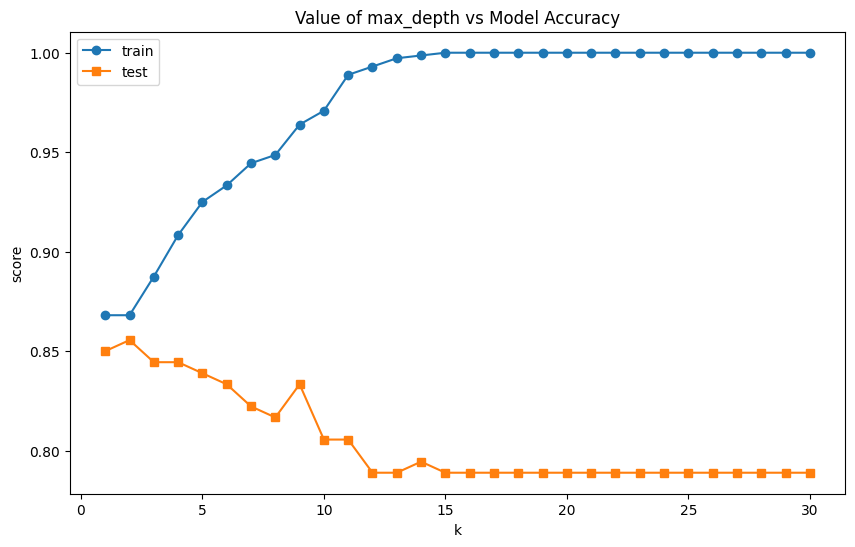

In [11]:
# plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depths , train_score, 'o-', label='train')
plt.plot(max_depths , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of max_depth vs Model Accuracy')
plt.legend()

In [17]:
# decision tree with max_depth as 4
tree = DecisionTreeClassifier(max_depth=4,random_state=42)

start = time.time()
tree.fit(X_train, y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
train_score = tree.score(X_train, y_train)
print(f"Accuracy of training: {train_score:.2f}")

start = time.time()
test_pred = tree.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

test_score = tree.score(X_test, y_test)
print(f"Accuracy of testing: {test_score:.2f}")

Training Time:  0.0072154998779296875
Accuracy of training: 0.91
Query Time:  0.0008940696716308594
Accuracy of testing: 0.84


Model 3: K-nearest neighbors 